<a href="https://colab.research.google.com/github/JeeshnuMaharjan/Weekly-Workshop-Python/blob/main/2408237_Jeeshnu_Maharjan_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preprocessing**
---
1.   Loading the dataset through google drive.
2.   Displaying first five rows.
3.   Cleaning the Data by checking any missing or duplicate values.
4.   Sorting needed values in order.
5.   Data visualization.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#         DATA OVERVIEW

# Loading the dataset using pandas
crop_yield_df = pd.read_csv("/content/drive/MyDrive/crop_yield.csv")

print("\033[4m                  \033[0m")
print("\033[4m\033[1mDATA PREPROCESSING\033[0m\033[0m\n\n")
print("\t\t\t\033[1mDATASET OVERVIEW:\033[0m\n")

# Previewing the first 5 rows of the dataset
print("\033[4mFIRST 5 ROWS OF THE DATASET\033[0m")
print(crop_yield_df.head())
print()



#       CHECKING MISSING VALUES

# Checking for any missing values in the dataset
missing_values = crop_yield_df.isnull().sum()

# Displaying the total count of missing values for each column
print("\n    \033[1mMISSING VALUES:\033[0m")
print("\nCOLUMN \t  MISSING COUNT")
print("-----------------------")
print(missing_values)
print()

# Identifying the number of rows and columns
rows, columns = crop_yield_df.shape
print(f"\n\033[4mTHE NUMBER OF ROWS AND COLUMNS\033[0m \nRows: \033[1m{rows}\033[0m \nColumns: \033[1m{columns}\033[0m")
print()

# Listing all columns and their data types
print("\nCOLUMN\t\tDATATYPE")
print("-----------------------")
print(crop_yield_df.dtypes)
print()



#       STATISTICAL ANALYSIS

print("\n\033[1mSTATISTICAL ANALYSIS\033[0m\n")

# Calculating basic statistics for the 'Yield' column
mean_score = crop_yield_df['Yield'].mean()
median_score = crop_yield_df['Yield'].median()
std_score = crop_yield_df['Yield'].std()

print(f"\033[4mBASIC STATISTICS\033[0m")
print(f"Mean Yield: \033[1m{mean_score:.2f}\033[0m")
print(f"Median Yield: \033[1m{median_score:.2f}\033[0m")
print(f"Standard Deviation: \033[1m{std_score:.2f}\033[0m")
print()

# Statistical Summary
description = crop_yield_df.describe()
print(f"\n\033[4mDETAILED STATISTICAL SUMMARY:\033[0m\n{description}")
print()


#       DATA CLEANING

#       FILTERING AND SORTING RICE DATA

# Filtering dataset for only 'Rice' crops
rice_yield_df = crop_yield_df[crop_yield_df["Crop"] == "Rice"]
rice_yield_df = rice_yield_df.sort_values(by=["Crop_Year"], ascending=[False])

print("\n\t\t\t  \033[1mDATA CLEANING:\033[0m")
print("\n\033[1mFILTERED DATASET (RICE ONLY)\033[0m")

# Ensuring no extra spaces in 'Season' column
rice_yield_df['Season'] = rice_yield_df['Season'].str.strip()

# Final season value replacement
rice_yield_df['Season'] = rice_yield_df['Season'].replace({"Kharif": "Monsoon", "Rabi": "Winter"})

# Saving the cleaned and sorted Rice dataset
rice_yield_df.to_csv("/content/drive/MyDrive/Rice_Yield_Dataset.csv", index=False)

# Resetting index for better readability
rice_yield_df = rice_yield_df.reset_index(drop=True)

print("\033[4mFIRST 5 ROWS OF SORTED RICE DATASET:\033[0m")
print(rice_yield_df.head())
print("\n\033[1mCleaned Rice dataset saved successfully.\033[0m\n")


                  
DATA PREPROCESSING


			DATASET OVERVIEW:

FIRST 5 ROWS OF THE DATASET
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


    MISSING VALUES:

COLUMN 	  MISSING COUNT
-----------------------
Crop               0
Crop_Year          0
Season             0
State  

# **Data Visualaisation**

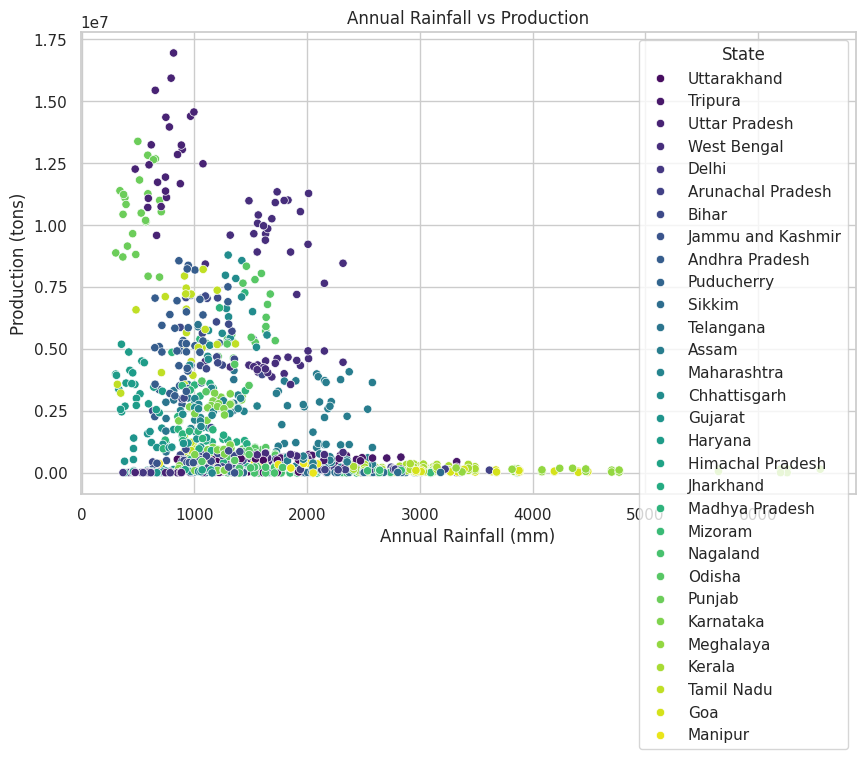

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Annual Rainfall vs Production, grouped by State
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rice_yield_df, x='Annual_Rainfall', y='Production', hue='State', palette='viridis')
plt.title('Annual Rainfall vs Production')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Production (tons)')
plt.legend(title='State')
plt.show()


<ipython-input-84-9dbb205446b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rice_yield_df, x='Season', y='Production', palette='Set2')


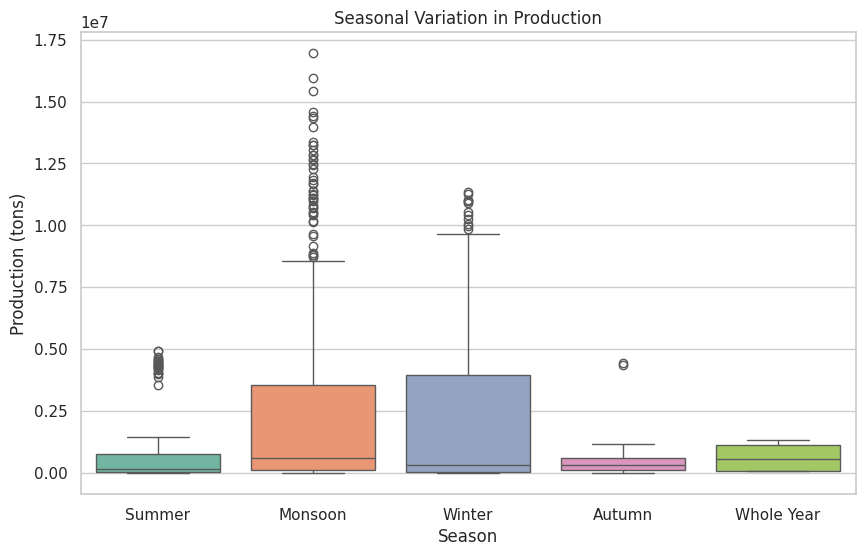

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rice_yield_df, x='Season', y='Production', palette='Set2')
plt.title('Seasonal Variation in Production')
plt.xlabel('Season')
plt.ylabel('Production (tons)')
plt.show()


# **Splitting Dataset into Training and Testing Sets**

**Preparing data and varibales for Training and Testing**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

print("\t\t\t\033[1mDATA ENCODING AND FEATURE SCALING\033[0m")

# Define features (independent variables) and target (dependent variable)
features = [
    'State',
    'Season',
    'Area',
    'Production',
    'Annual_Rainfall',
    'Fertilizer',
    'Pesticide'
]
target = 'Yield'

#       ENCODING FOR STATE
print("\n\033[1m\033[4mENCODING FOR STATE\033[0m")

# Set the correct order for the categories
rice_yield_df['State'] = pd.Categorical(rice_yield_df['State'])

# Convert categorical target variable into numerical labels (0, 1, 2, ...)
rice_yield_df['State'] = rice_yield_df['State'].cat.codes

# Verify the encoding
print(f"Unique State values: {rice_yield_df['State'].unique()}")
print(f"Unique State values in order: {np.unique(rice_yield_df['State'])}")
print("--------------------------------------------------------------------------------------------------------")

#       ENCODING FOR SEASON
print("\033[1m\033[4mENCODING FOR SEASON\033[0m")

# Set the correct order for the categories
rice_yield_df['Season'] = pd.Categorical(
    rice_yield_df['Season'],
    categories=['Monsoon', 'Winter', 'Summer', 'Autumn', 'Whole Year'],
    ordered=True
)

# Convert categorical target variable into numerical labels (0, 1, 2, 3, 4)
rice_yield_df['Season'] = rice_yield_df['Season'].cat.codes

# Verify the encoding
print(f"Unique Season values: {rice_yield_df['Season'].unique()}")
print(f"Unique Season values in order: {np.unique(rice_yield_df['Season'])}")

# Prepare the feature matrix X (independent variables)
X = rice_yield_df[features].values

# Prepare the target variable y (dependent variable with integer labels)
y = rice_yield_df[target].values


#       FEATURE SCALING (Normalizing the value of X)

# input features (X) have very large values or different scales, it can cause the dot product X.dot(W) to become excessively large.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Verify the shapes of X and y
print("--------------------------------------------------------------------------------------------------------")
print(f"\033[4mShape of X:\033[0m {X.shape}")
print(f"\033[4mShape of y:\033[0m {y.shape}")
print()


			DATA ENCODING AND FEATURE SCALING

ENCODING FOR STATE
Unique State values: [28 26 27 29  5  1  3 10  0 21 23 25  2 15  4  7  8  9 11 14 18 19 20 22
 12 17 13 24  6 16]
Unique State values in order: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
--------------------------------------------------------------------------------------------------------
ENCODING FOR SEASON
Unique Season values: [2 0 1 3 4]
Unique Season values in order: [0 1 2 3 4]
--------------------------------------------------------------------------------------------------------
Shape of X: (1197, 7)
Shape of y: (1197,)



**Splitting Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# **Building Logistic Regression for Classification dataset from Scratch**

**Bias Addition and Weight Initialization for Model Training**

In [ ]:
import numpy as np

#       ADDING BIAS TERM
# Add bias term (intercept) to X_train and X_test
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias column
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias column

# Initialize weights for the model
W = np.zeros(X_train_b.shape[1])  # Start with weights of zeros

#       **TRAINING SET SHAPE**
print("\033[1mTRAINING SET SHAPE:\033[0m")
print(f"X_train_b shape: {X_train_b.shape}, y_train shape: {y_train.shape}\n")

#       **TESTING SET SHAPE**
print("\033[1mTESTING SET SHAPE:\033[0m")
print(f"X_test_b shape: {X_test_b.shape}, y_test shape: {y_test.shape}\n")

#       INITIAL WEIGHTS
print("\033[1mINITIAL WEIGHTS:\033[0m")
print(f"Initial Weights (W): {W}")

TRAINING SET SHAPE:
X_train_b shape: (957, 8), y_train shape: (957,)

TESTING SET SHAPE:
X_test_b shape: (240, 8), y_test shape: (240,)

INITIAL WEIGHTS:
Initial Weights (W): [0. 0. 0. 0. 0. 0. 0. 0.]


**Cost Function**

In [ ]:
# Define the cost function
def cost_function(X, Y, W):
    """
    Calculates the Mean Squared Error.
    """
    m = len(Y)  # Number of samples
    J = np.sum((X.dot(W) - Y) ** 2) / (2 * m)
    return J

**Gradient Descent Calculation**

In [ ]:
# Define the gradient descent function
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Performs gradient descent to minimize the cost function.
    """
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Calculate predictions
        Y_pred = X.dot(W)
        # Calculate the difference between predictions and actual values
        loss = Y_pred - Y
        # Gradient calculation
        gradient = X.T.dot(loss) / m
        # Update weights
        W = W - alpha * gradient
        # Calculate the cost
        cost_history[iteration] = cost_function(X, Y, W)

    return W, cost_history


**Calculating MSE, RMSE, R²**

In [ ]:
import numpy as np

def mse(Y, Y_pred):
    # Calculate MSE using numpy
    m = len(Y)
    mse = np.sum((Y_pred - Y) ** 2) / m
    return mse

In [ ]:
# Define RMSE evaluation function
def rmse(Y, Y_pred):
    """
    Calculates the Root Mean Squared Error.
    """
    mse_value = mse(Y, Y_pred)  # Call the mse function here
    return np.sqrt(mse_value)  # Take the square root of the MSE to get RMSE

In [ ]:
# Define R² evaluation function
def r2(Y, Y_pred):
    """
    Calculates the R-squared value.
    """
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

**Training parameter and calculating Final Cost**



In [ ]:
# Training parameters
alpha = 0.1  # Learning rate
iterations = 100000  # Number of iterations

# Train the model using gradient descent
new_weights, cost_history = gradient_descent(X_train_b, y_train, W, alpha, iterations)

# Output the final weights and cost
print("\033[1mFinal Weights:\033[0m")
print(new_weights)
print("\n\033[1mFinal Cost:\033[0m")
print(cost_history[-1])

Final Weights:
[ 2.15506659  0.39741609 -0.08288605 -6.46931592  5.65760092 -0.47414363
 -0.45117106  0.42494897]

Final Cost:
0.21557385410374047


**Comparing values from training and testing sets**

In [ ]:
# Predictions on the training data
y_train_pred = X_train_b.dot(new_weights)

# Predictions on the test data
y_test_pred = X_test_b.dot(new_weights)

# Calculate MSE, RMSE and R² Score for training set
train_mse= mse(y_train, y_train_pred)
train_rmse = rmse(y_train, y_train_pred)
train_r2 = r2(y_train, y_train_pred)

# Calculate RMSE and R² Score for test set
test_mse= mse(y_test, y_test_pred)
test_rmse = rmse(y_test, y_test_pred)
test_r2 = r2(y_test, y_test_pred)

# Print results
print("\033[1mTraining MSE:\033[0m", train_mse)
print("\033[1mTraining RMSE:\033[0m", train_rmse)
print("\033[1mTraining R² Score:\033[0m", train_r2)

print("\n\033[1mTraining MSE:\033[0m", test_mse)
print("\033[1mTest RMSE:\033[0m", test_rmse)
print("\033[1mTest R² Score:\033[0m", test_r2)

Training MSE: 0.43114770820748094
Training RMSE: 0.6566183885694041
Training R² Score: 0.3570250242486863

Training MSE: 0.29802258644794255
Test RMSE: 0.5459144497519208
Test R² Score: 0.44291131344468215


**Comparing the testing and training's actual and prediction values (y)**

In [ ]:
# Compute predictions for training and test sets
y_train_pred = X_train_b.dot(new_weights)  # Predictions for training data
y_test_pred = X_test_b.dot(new_weights)  # Predictions for test data

# Print first 10 actual vs predicted values for training set
print("\033[1mTraining Set Predictions (first 5 rows):\033[0m")
print("---------------------------------------")
for actual, predicted in zip(y_train[:5], y_train_pred[:5]):
    print(f"Actual: {actual:.4f} -> Predicted: {predicted:.4f}")
print("---------------------------------------")
# Print first 10 actual vs predicted values for test set
print("\n\033[1mTest Set Predictions (first 5 rows):\033[0m")
print("---------------------------------------")
for actual, predicted in zip(y_test[:5], y_test_pred[:5]):
    print(f"Actual: {actual:.4f} -> Predicted: {predicted:.4f}")
print("---------------------------------------\n")

Training Set Predictions (first 5 rows):
---------------------------------------
Actual: 1.0604 -> Predicted: 1.9499
Actual: 2.4800 -> Predicted: 2.0837
Actual: 1.3229 -> Predicted: 2.1009
Actual: 1.3939 -> Predicted: 1.0119
Actual: 2.1562 -> Predicted: 2.1311
---------------------------------------

Test Set Predictions (first 5 rows):
---------------------------------------
Actual: 2.3056 -> Predicted: 2.3546
Actual: 1.7600 -> Predicted: 2.2923
Actual: 1.5654 -> Predicted: 2.0556
Actual: 1.7986 -> Predicted: 2.1441
Actual: 2.5700 -> Predicted: 2.1094
---------------------------------------



# **Building Primary models for Regression using SciKit Learn**

# Polynomial Regression

**Step 1: BUILD MODEL**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # You can change the degree of the polynomial

# Transform the features
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Initialize Linear Regression model
poly_reg_model = LinearRegression()

# Train the model
poly_reg_model.fit(X_poly_train, y_train)

# Predict on test data
poly_y_pred = poly_reg_model.predict(X_poly_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

**Step 2: EVALUTE THE MODEL WITH**





1.   Mean Absolute Error (MAE)
2.   Root Mean Squared Error (RMSE)
3.   R-Squared (R²)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate Polynomial Regression model
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_y_pred))
poly_r2 = r2_score(y_test, poly_y_pred)

print(f"\033[1mPolynomial Regression Model Performance:\n\033[0m MSE: {poly_mse}\n RMSE: {poly_rmse}\n R²: {poly_r2}")


Polynomial Regression Model Performance:
 MSE: 0.16261796123362965
 RMSE: 0.40325917377491816
 R²: 0.6960209374943778


**Comparing the testing and training's actual and prediction values (y)**

In [ ]:
# Polynomial Regression - Training Set Predictions (first 10 rows)
print("\n  \033[1mPolynomial Regression - Training Set Predictions (first 10 rows):\033[1m")
print("---------------------------------------------------------------------")
for actual, predicted in zip(y_train[:10], poly_reg_model.predict(poly.transform(X_train))[:10]):
    print(f"  Actual: {actual:.4f}   \t\t\t\tPredicted: {predicted:.4f}")

print("---------------------------------------------------------------------\n")

# Polynomial Regression - Test Set Predictions (first 10 rows)
print("\n  \033[1mPolynomial Regression - Testing Set Predictions (first 10 rows):\033[1m")
print("---------------------------------------------------------------------")
for actual, predicted in zip(y_test[:10], poly_y_pred[:10]):
    print(f"  Actual: {actual:.4f}   \t\t\t\tPredicted: {predicted:.4f}")

print("---------------------------------------------------------------------\n")



  Polynomial Regression - Training Set Predictions (first 10 rows):
---------------------------------------------------------------------
  Actual: 1.0604   				Predicted: 1.9735
  Actual: 2.4800   				Predicted: 2.3454
  Actual: 1.3229   				Predicted: 1.6114
  Actual: 1.3939   				Predicted: 1.4929
  Actual: 2.1562   				Predicted: 1.8129
  Actual: 3.1500   				Predicted: 2.7316
  Actual: 1.5458   				Predicted: 1.7634
  Actual: 2.7300   				Predicted: 2.0760
  Actual: 3.4595   				Predicted: 3.6776
  Actual: 3.0637   				Predicted: 2.5827
---------------------------------------------------------------------


  Polynomial Regression - Testing Set Predictions (first 10 rows):
---------------------------------------------------------------------
  Actual: 2.3056   				Predicted: 2.4251
  Actual: 1.7600   				Predicted: 1.9301
  Actual: 1.5654   				Predicted: 1.9306
  Actual: 1.7986   				Predicted: 1.8476
  Actual: 2.5700   				Predicted: 2.3004
  Actual: 0.9624   				Predicted: 1.1

**Step 3: Hyper-parameter Optimization with Cross-Validation**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the Polynomial Regression pipeline
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Polynomial transformation
    ('scaler', StandardScaler()),    # Standardize features
    ('regressor', LinearRegression())  # Linear regression model
])

# Define hyperparameter distributions
poly_params = {
    'poly__degree': randint(1, 5),  # Tune polynomial degree between 1 and 5
    'poly__interaction_only': [True, False],  # Include/exclude interaction terms
}

# Perform Randomized Search CV
poly_search = RandomizedSearchCV(poly_pipeline, poly_params, n_iter=10, scoring='r2', cv=5, random_state=42, n_jobs=-1)
poly_search.fit(X_train, y_train)

# Get the best model
poly_best = poly_search.best_estimator_

# Output the best hyperparameters
print("Best Hyperparameters for Polynomial Regression:", poly_search.best_params_)


Best Hyperparameters for Polynomial Regression: {'poly__degree': 3, 'poly__interaction_only': True}


**Step 4: FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply f_regression for feature selection
selector = SelectKBest(score_func=f_regression, k='all')  # 'all' keeps all features for ranking
X_selected = selector.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': features, 'F-Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

# Display feature importance
print(feature_scores)
print("\n\033[3mNOTE: Feature Importance Ranking (Higher F-score = More Important):\033[0m")

# Select top k features (e.g., best 5)
top_k = 5
selected_features = feature_scores.nlargest(top_k, 'F-Score')['Feature'].tolist()
print(f"\nTop {top_k} Selected Features: {selected_features}")

           Feature    F-Score
0            State  63.083273
3       Production  59.369405
4  Annual_Rainfall  18.898475
1           Season   8.579204
2             Area   1.391747
5       Fertilizer   0.001331
6        Pesticide   0.000517

NOTE: Feature Importance Ranking (Higher F-score = More Important):

Top 5 Selected Features: ['State', 'Production', 'Annual_Rainfall', 'Season', 'Area']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define the selected top features and target variable
selected_features = ['State',
                     'Production',
                     'Annual_Rainfall',
                     'Season',
                     'Area',
                     'Fertilizer',
                     'Pesticide'
                     ]
target = 'Yield'

# Extract feature matrix (X) and target variable (y)
X = rice_yield_df[selected_features].values
y = rice_yield_df[target].values

# Split the dataset into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Final Model with selected Features and best Hyperparameters**

In [ ]:
#             ~FINAL POLYNOMIAL REGRESSION MODEL~

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Retrieve the best polynomial model from RandomizedSearchCV
poly_model_final = poly_best

# Training the Polynomial Regression model
poly_model_final.fit(X_train, y_train)

# Testing the Polynomial Regression model
y_pred_poly_test = poly_model_final.predict(X_test)
y_pred_poly_train = poly_model_final.predict(X_train)

# Evaluating the Polynomial Regression model
print("\n\033[1mPolynomial Regression Final Model Results:\033[0m")
print("----------------------------------------------------")

mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
r2_poly_test = r2_score(y_test, y_pred_poly_test)
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
r2_poly_train = r2_score(y_train, y_pred_poly_train)

print(f"Testing Set Mean Squared Error: {mse_poly_test}")
print(f"Testing Set R² Score: {r2_poly_test}")
print()
print(f"Training Set Mean Squared Error: {mse_poly_train}")
print(f"Training Set R² Score: {r2_poly_train}")

print("----------------------------------------------------\n")

# Print first 10 actual vs predicted values for training set
print("\n\033[1mPolynomial Regression - Training Set Predictions (first 10 rows):\033[0m")
print("----------------------------------------------------------------")
for actual, predicted in zip(y_train[:10], y_pred_poly_train[:10]):
    print(f"Actual: {actual}, ->\t\tPredicted: {predicted}")
print("----------------------------------------------------------------\n")

# Print first 10 actual vs predicted values for test set
print("\n\033[1mPolynomial Regression - Test Set Predictions (first 10 rows):\033[0m")
print("----------------------------------------------------------------")
for actual, predicted in zip(y_test[:10], y_pred_poly_test[:10]):
    print(f"Actual: {actual}, ->\t\tPredicted: {predicted}")

print("----------------------------------------------------------------\n")



Polynomial Regression Final Model Results:
----------------------------------------------------
Testing Set Mean Squared Error: 0.18162773444007108
Testing Set R² Score: 0.6604862831800452

Training Set Mean Squared Error: 0.28125482006809793
Training Set R² Score: 0.5805618175147531
----------------------------------------------------


Polynomial Regression - Training Set Predictions (first 10 rows):
----------------------------------------------------------------
Actual: 1.060434783, ->		Predicted: 1.7620741314163975
Actual: 2.48, ->		Predicted: 2.2008086296765397
Actual: 1.322916667, ->		Predicted: 1.3987859545399728
Actual: 1.393888889, ->		Predicted: 1.2998860600293152
Actual: 2.15625, ->		Predicted: 2.054389824865413
Actual: 3.15, ->		Predicted: 2.7293224887741907
Actual: 1.545789474, ->		Predicted: 1.637979492741734
Actual: 2.73, ->		Predicted: 2.162923824754208
Actual: 3.45952381, ->		Predicted: 3.6782667414375414
Actual: 3.063703704, ->		Predicted: 2.5508475753626136
-------

# Support Vector Regression (SVR)


**Step 1: BUILD MODEL**

In [ ]:
from sklearn.svm import SVR

# Initialize SVR model
svr_model = SVR(kernel='rbf')  # Radial Basis Function kernel

# Train the model
svr_model.fit(X_train, y_train)

# Predict on test data
svr_y_pred = svr_model.predict(X_test)

**Step 2: EVALUTE THE MODEL WITH**





1.   Mean Absolute Error (MAE)
2.   Root Mean Squared Error (RMSE)
3.   R-Squared (R²)



In [ ]:
# Evaluate SVR model
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
svr_r2 = r2_score(y_test, svr_y_pred)

print(f"\033[1mSVR Model Performance:\033[0m\n MSE: {svr_mse}\n RMSE: {svr_rmse}\n R²: {svr_r2}")

SVR Model Performance:
 MSE: 0.49150400746462136
 RMSE: 0.7010734679508428
 R²: 0.08123969656585295


**Comparing the testing and training's actual and prediction values (y)**

In [ ]:
#             ~SVR MODEL PREDICTIONS~

# SVR - Training Set Predictions (first 10 rows)
print("\n\033[1mSVR - Training Set Predictions (first 10 rows):\033[0m")
print("------------------------------------------------------")
for actual, predicted in zip(y_train[:10], svr_model.predict(X_train)[:10]):
    print(f"Actual: {actual:.4f}  \t->\tPredicted: {predicted:.4f}")
print("------------------------------------------------------\n")

# SVR - Test Set Predictions (first 10 rows)
print("\n\033[1mSVR - Test Set Predictions (first 10 rows):\033[0m")
print("------------------------------------------------------")
for actual, predicted in zip(y_test[:10], svr_y_pred[:10]):
    print(f"Actual: {actual:.4f}  \t->\tPredicted: {predicted:.4f}")
print("------------------------------------------------------\n")



SVR - Training Set Predictions (first 10 rows):
------------------------------------------------------
Actual: 1.0604  	->	Predicted: 2.1810
Actual: 2.4800  	->	Predicted: 2.2775
Actual: 1.3229  	->	Predicted: 1.8678
Actual: 1.3939  	->	Predicted: 2.0086
Actual: 2.1562  	->	Predicted: 2.3544
Actual: 3.1500  	->	Predicted: 2.3632
Actual: 1.5458  	->	Predicted: 1.8405
Actual: 2.7300  	->	Predicted: 2.3797
Actual: 3.4595  	->	Predicted: 2.7010
Actual: 3.0637  	->	Predicted: 2.0071
------------------------------------------------------


SVR - Test Set Predictions (first 10 rows):
------------------------------------------------------
Actual: 2.3056  	->	Predicted: 2.1938
Actual: 1.7600  	->	Predicted: 2.3658
Actual: 1.5654  	->	Predicted: 2.2605
Actual: 1.7986  	->	Predicted: 2.2487
Actual: 2.5700  	->	Predicted: 2.3570
Actual: 0.9624  	->	Predicted: 1.8705
Actual: 1.7671  	->	Predicted: 2.2567
Actual: 1.0622  	->	Predicted: 1.8956
Actual: 1.7362  	->	Predicted: 2.0037
Actual: 3.6118  	-

**Step 3: Hyper-parameter Optimization with Cross-Validation**

In [ ]:
#NOTE: took over 5 hours and was still executing. So, i stopped the code and tuned manually.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Initialize SVR model
svr = SVR()

# Define hyperparameter distribution, focusing on C and epsilon
svr_params = {
    'C': uniform(0.1, 100),  # Regularization parameter (start with reasonable range)
    'epsilon': uniform(0.01, 1),  # Epsilon in the loss function
    'gamma': ['scale', 'auto'],  # Kernel coefficient (simplify gamma options)
    'kernel': ['rbf', 'linear']  # Kernel type (focus on 'rbf' and 'linear' kernels)
}

# Perform Randomized Search CV
svr_search = RandomizedSearchCV(svr, svr_params, n_iter=1, scoring='r2', cv=5, random_state=42, n_jobs=-1)
svr_search.fit(X_train, y_train)

# Get the best model
svr_best = svr_search.best_estimator_

# Output the best hyperparameters
print("Best Hyperparameters for Support Vector Regressor:", svr_search.best_params_)

**Step 4: FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply f_regression for feature selection
selector = SelectKBest(score_func=f_regression, k='all')  # 'all' keeps all features for ranking
X_selected = selector.fit_transform(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': features, 'F-Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

# Display feature importance
print(feature_scores)
print("\n\033[3mNOTE: Feature Importance Ranking (Higher F-score = More Important):\033[0m")

# Select top k features (e.g., best 5)
top_k = 5
selected_features = feature_scores.nlargest(top_k, 'F-Score')['Feature'].tolist()
print(f"\nTop {top_k} Selected Features: {selected_features}")

           Feature    F-Score
0            State  63.083273
1           Season  59.369405
2             Area  18.898475
3       Production   8.579204
4  Annual_Rainfall   1.391747
5       Fertilizer   0.001331
6        Pesticide   0.000517

NOTE: Feature Importance Ranking (Higher F-score = More Important):

Top 5 Selected Features: ['State', 'Season', 'Area', 'Production', 'Annual_Rainfall']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Define the selected top features and target variable
selected_features = ['State',
                     'Production',
                     'Annual_Rainfall',
                     'Season',
                     'Area']
target = 'Yield'

# Extract feature matrix (X) and target variable (y)
X = rice_yield_df[selected_features].values
y = rice_yield_df[target].values

# Split the dataset into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Final Model with selected Features and best Hyperparameters**

In [ ]:
# ---------------------------- Final SVR Model ---------------------------- #

# Create the SVR model with the best hyperparameters
svr_model_final = SVR(
    C=90.96584841970366,
    epsilon=0.16601864044243653,
    gamma='scale',
    kernel='rbf'
)

# Training the SVR model
svr_model_final.fit(X_train, y_train)

# Testing the SVR Model
y_pred_svr_test = svr_model_final.predict(X_test)
y_pred_svr_train = svr_model_final.predict(X_train)

#             ~SVR FINAL MODEL RESULTS~

print("\n\033[1mSVR Final Model Results:\033[0m")
print("----------------------------------------------------------")
mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
r2_svr_test = r2_score(y_test, y_pred_svr_test)
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
r2_svr_train = r2_score(y_train, y_pred_svr_train)

print(f"Testing Set Mean Squared Error: {mse_svr_test}")
print(f"Testing Set R² Score: {r2_svr_test}")

print(f"Training Set Mean Squared Error: {mse_svr_train}")
print(f"Training Set R² Score: {r2_svr_train}")

print("---------------------------------------------------------\n")

# Print first 10 actual vs predicted values for training set
print("\n\033[1mSVR - Training Set Predictions (first 10 rows):\033[0m")
print("------------------------------------------------------")
for actual, predicted in zip(y_train[:10], y_pred_svr_train[:10]):
    print(f"Actual: {actual:.4f}  ->\t\tPredicted: {predicted:.4f}")
print("------------------------------------------------------\n")

# Print first 10 actual vs predicted values for test set
print("\n\033[1mSVR - Test Set Predictions (first 10 rows):\033[0m")
print("----------------------------------------------------")
for actual, predicted in zip(y_test[:10], y_pred_svr_test[:10]):
    print(f"Actual: {actual:.4f}  ->\t\tPredicted: {predicted:.4f}")
print("----------------------------------------------------\n")



SVR Final Model Results:
----------------------------------------------------------
Testing Set Mean Squared Error: 0.15630693962295575
Testing Set R² Score: 0.7078180257010687
Training Set Mean Squared Error: 0.2720690422106326
Training Set R² Score: 0.5942606617454604
---------------------------------------------------------


SVR - Training Set Predictions (first 10 rows):
------------------------------------------------------
Actual: 1.0604  ->		Predicted: 1.7311
Actual: 2.4800  ->		Predicted: 2.3116
Actual: 1.3229  ->		Predicted: 1.1364
Actual: 1.3939  ->		Predicted: 1.3873
Actual: 2.1562  ->		Predicted: 2.3036
Actual: 3.1500  ->		Predicted: 2.3392
Actual: 1.5458  ->		Predicted: 1.6472
Actual: 2.7300  ->		Predicted: 2.3301
Actual: 3.4595  ->		Predicted: 3.3304
Actual: 3.0637  ->		Predicted: 2.5932
------------------------------------------------------


SVR - Test Set Predictions (first 10 rows):
----------------------------------------------------
Actual: 2.3056  ->		Predicted: 

**Conclusion**

1. Model Performance:

    --> Both model showed a Good fit in Testing set with 0.707 in SVR model and 0.660 in Polynomial Regression in R-squared value. And slightly less in training set. MSE value of both models were very good, giving around 0.1 and 0.2 score.
    

2. Impact of Methods:

    -->  The best hyperparameters for Polynomial Regression ('poly__degree': 3, 'poly__interaction_only': True) brought minor changes to stability while the SVR (C=90.96584841970366, epsilon=0.16601864044243653, gamma='scale', kernel='rbf') were fitted manually, and brought decent changes.
    

3. Insights and Future Directions:

    --> Many other models could be explored for this dataset. Showing that the model performs well in unseen data more, but could be slightly underfitted due to less feature or simple model.